# Task : Number Recognition using MNIST dataset

By - Shubham Chaudhary

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [13]:
# loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
# Normalize the pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [15]:
# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [16]:
# Create a simple feedforward neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),   # Flatten 28x28 images into a 1D array
    Dense(128, activation='relu'),     # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),      # Hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax')    # Output layer with 10 neurons (one for each digit) and softmax activation
])

In [17]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10


1688/1688 [==============================] - 3s 1ms/step - loss: 0.2527 - accuracy: 0.9269 - val_loss: 0.1098 - val_accuracy: 0.9677
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1054 - accuracy: 0.9683 - val_loss: 0.0877 - val_accuracy: 0.9750
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0733 - accuracy: 0.9767 - val_loss: 0.0815 - val_accuracy: 0.9750
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0554 - accuracy: 0.9824 - val_loss: 0.0845 - val_accuracy: 0.9780
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0871 - val_accuracy: 0.9752
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0347 - accuracy: 0.9881 - val_loss: 0.0805 - val_accuracy: 0.9805
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.0911 - val_accuracy: 0.9775
Epo

In [19]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

  1/313 [..............................] - ETA: 5s - loss: 0.2251 - accuracy: 0.9375

313/313 [==============================] - 0s 667us/step - loss: 0.0972 - accuracy: 0.9776
Test accuracy: 0.9775999784469604


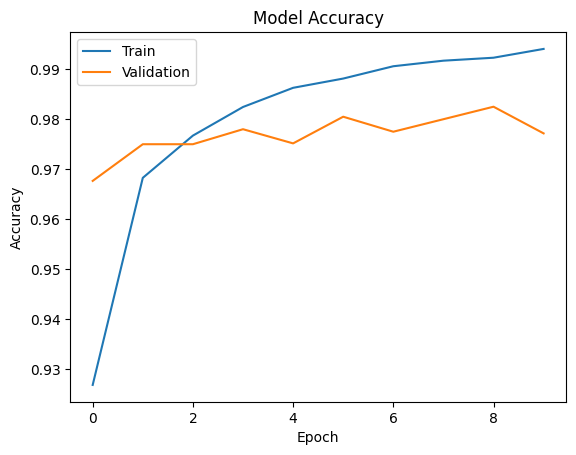

In [20]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [21]:
# Make predictions on some test samples
predictions = model.predict(x_test[:50])
predicted_labels = np.argmax(predictions, axis=1)


2/2 [==============================] - 0s 0s/step


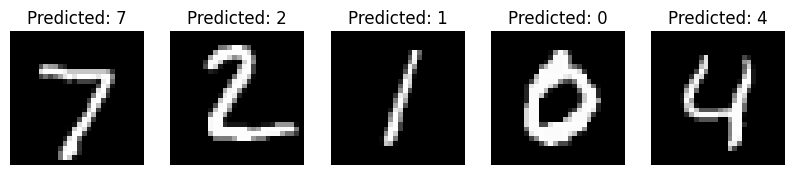

In [22]:
# Visualize the predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.show()